## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from gplearn.genetic import SymbolicRegressor
import os
import seaborn as sns
import matplotlib.pyplot as plt

from Model_Parent import *
from Model_Parent_2 import *

## Importing Data

In [2]:
df = pd.read_csv("../cleaned_data/forestfires_cleaned.csv", index_col=0)

In [3]:
df.drop('area', axis=1, inplace=True)

In [4]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,log_area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


## Check Data

In [ ]:
# Check to make sure that no columns have perfect colinearity

<AxesSubplot:>

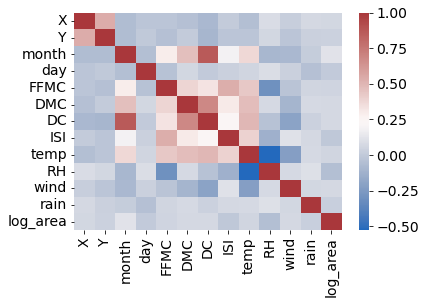

In [5]:
corr_mat = df.corr(method='pearson')
sns.heatmap(corr_mat, cmap='vlag')

## Breaking Data in X and y

In [7]:
X = df.iloc[:,:-1]

In [8]:
y = df.iloc[:,-1]

## Generating Models

### Linear Regression

In [63]:
lr = linear_model.LinearRegression()


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.651
Date:                Mon, 21 Feb 2022   Prob (F-statistic):             0.0745
Time:                        00:10:47   Log-Likelihood:                -896.50
No. Observations:                 517   AIC:                             1819.
Df Residuals:                     504   BIC:                             1874.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3048   

/Users/sdk/Desktop/UGA_proj/DS2_P1/python/Model_Parent_2.py:184: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


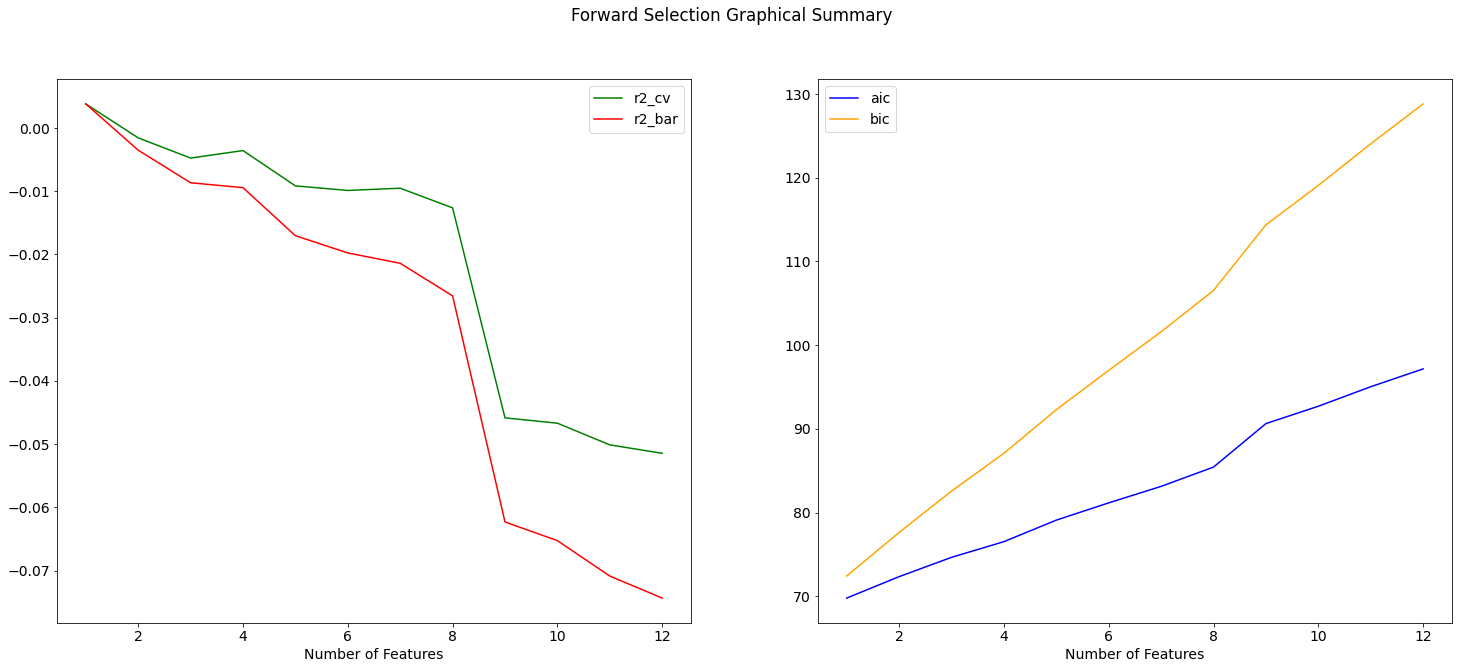

In [64]:
forwardSelection(lr, X, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.651
Date:                Mon, 21 Feb 2022   Prob (F-statistic):             0.0745
Time:                        00:10:56   Log-Likelihood:                -896.50
No. Observations:                 517   AIC:                             1819.
Df Residuals:                     504   BIC:                             1874.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3048  

/Users/sdk/Desktop/UGA_proj/DS2_P1/python/Model_Parent_2.py:286: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


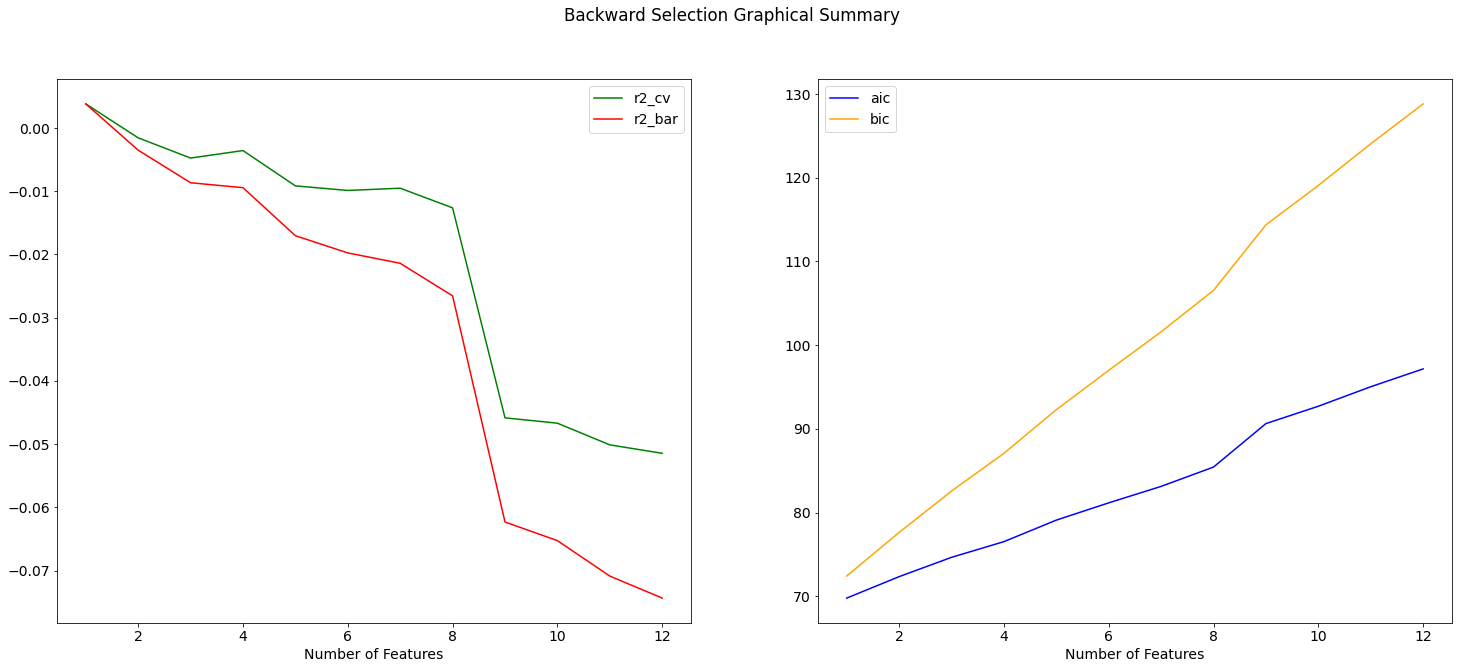

In [65]:
backwardSelection(lr, X, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.651
Date:                Mon, 21 Feb 2022   Prob (F-statistic):             0.0745
Time:                        00:11:00   Log-Likelihood:                -896.50
No. Observations:                 517   AIC:                             1819.
Df Residuals:                     504   BIC:                             1874.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3048  

/Users/sdk/Desktop/UGA_proj/DS2_P1/python/Model_Parent_2.py:406: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


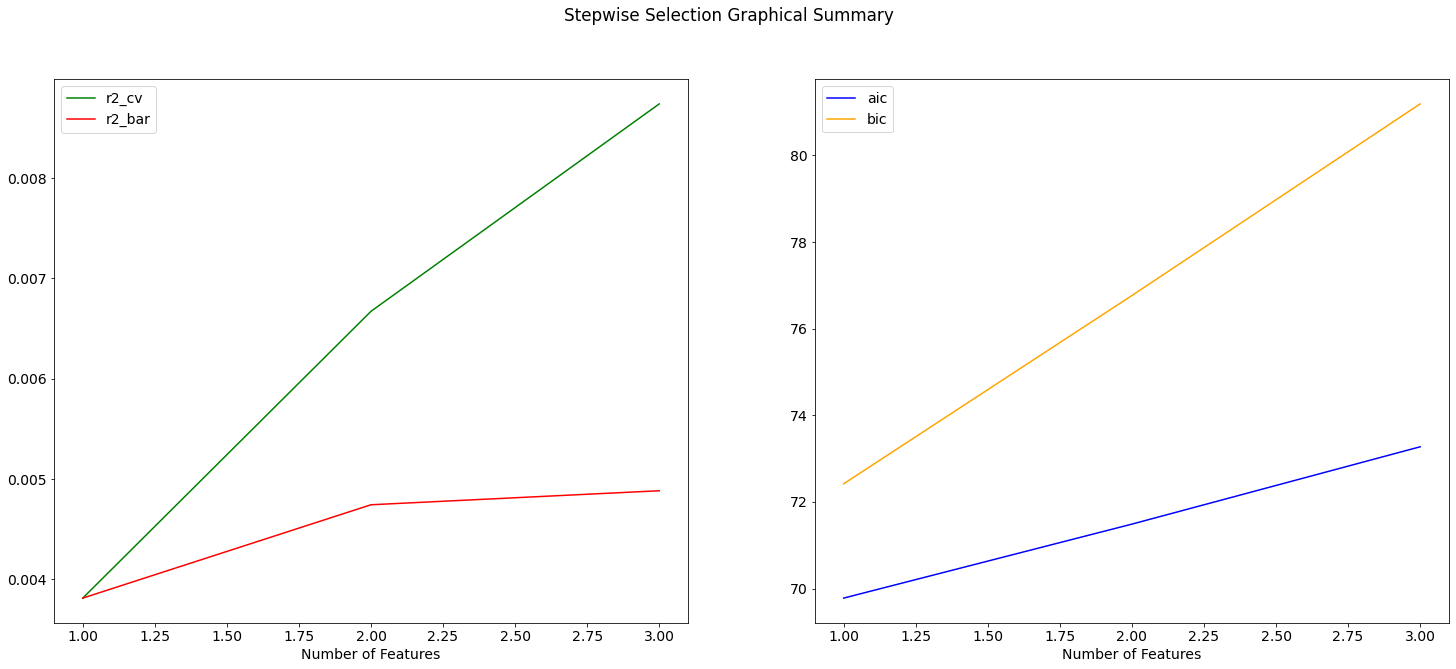

In [66]:
stepwiseSelection(lr, X, y)

### Ridge Regression

In [47]:
ridge = linear_model.Ridge()


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.559
Date:                Mon, 21 Feb 2022   Prob (F-statistic):              0.100
Time:                        00:03:06   Log-Likelihood:                -911.23
No. Observations:                 517   AIC:                             1848.
Df Residuals:                     504   BIC:                             1904.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1319   

/Users/sdk/Desktop/UGA_proj/DS2_P1/python/Model_Parent_2.py:184: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


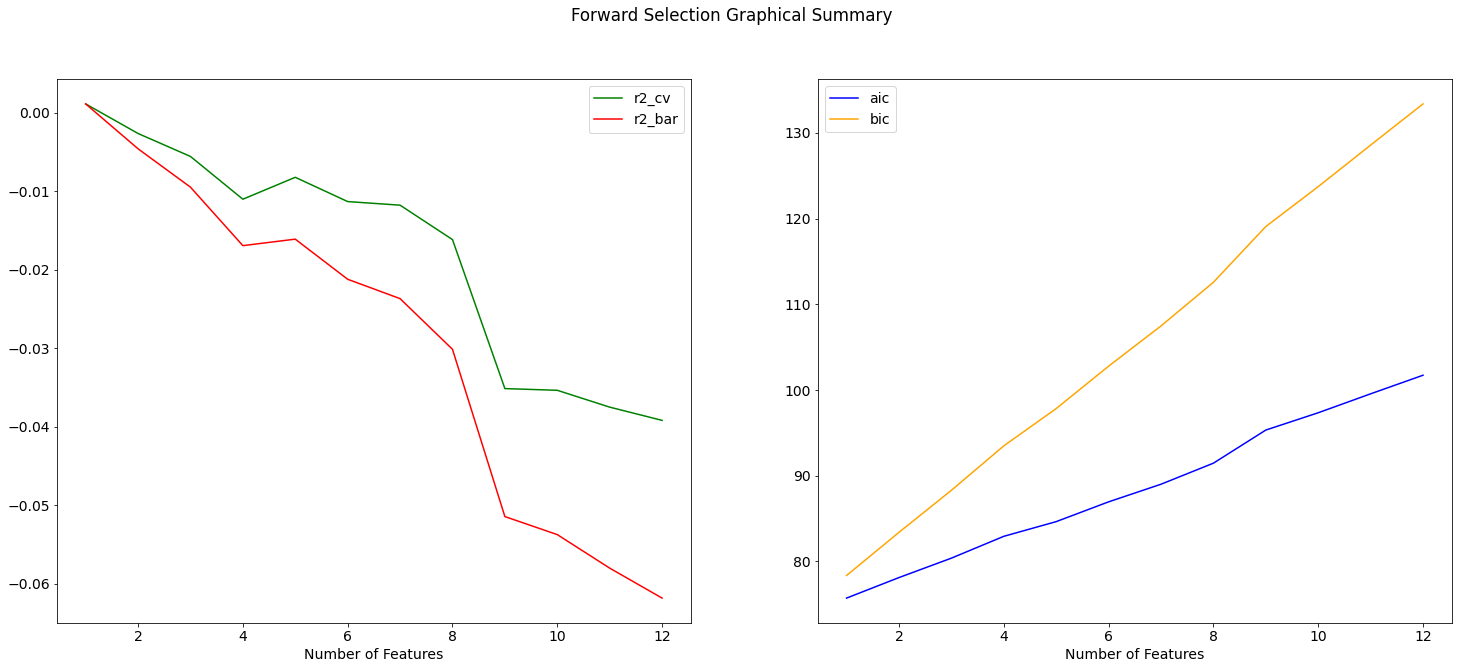

In [48]:
forwardSelection(ridge, X, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.559
Date:                Mon, 21 Feb 2022   Prob (F-statistic):              0.100
Time:                        00:03:06   Log-Likelihood:                -911.23
No. Observations:                 517   AIC:                             1848.
Df Residuals:                     504   BIC:                             1904.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1319  

/Users/sdk/Desktop/UGA_proj/DS2_P1/python/Model_Parent_2.py:286: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


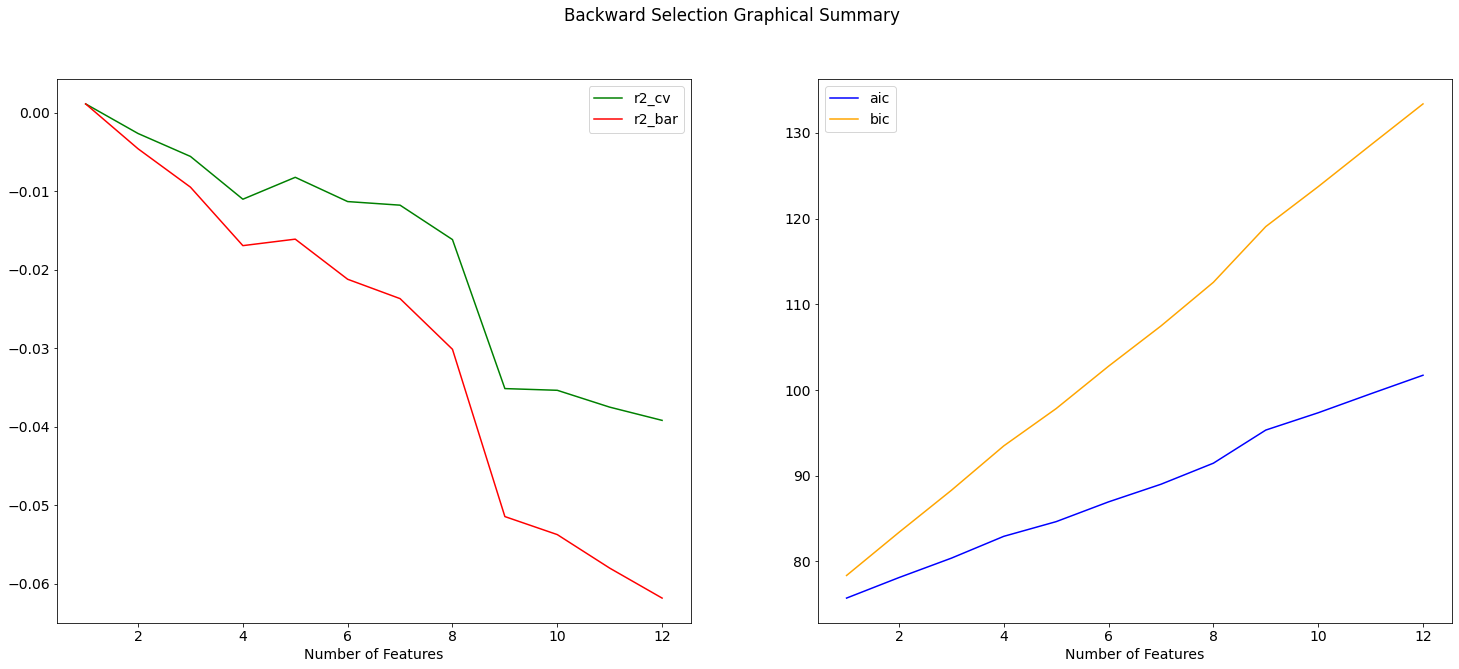

In [49]:
backwardSelection(ridge, X, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.559
Date:                Mon, 21 Feb 2022   Prob (F-statistic):              0.100
Time:                        00:03:06   Log-Likelihood:                -911.23
No. Observations:                 517   AIC:                             1848.
Df Residuals:                     504   BIC:                             1904.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1319  

/Users/sdk/Desktop/UGA_proj/DS2_P1/python/Model_Parent_2.py:406: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


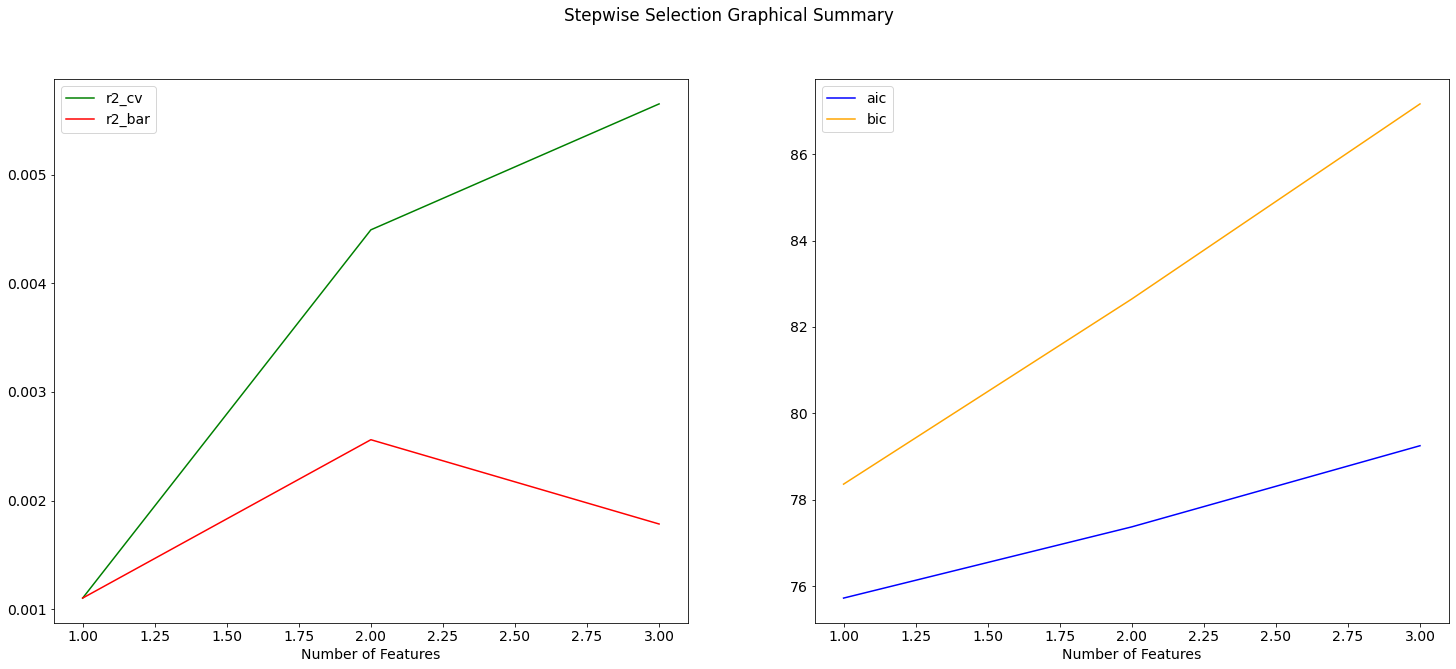

In [50]:
stepwiseSelection(ridge, X, y)

### Lasso Regression

In [51]:
lasso = linear_model.Lasso()


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.559
Date:                Mon, 21 Feb 2022   Prob (F-statistic):              0.100
Time:                        00:03:07   Log-Likelihood:                -911.23
No. Observations:                 517   AIC:                             1848.
Df Residuals:                     504   BIC:                             1904.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1319   

/Users/sdk/Desktop/UGA_proj/DS2_P1/python/Model_Parent_2.py:184: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


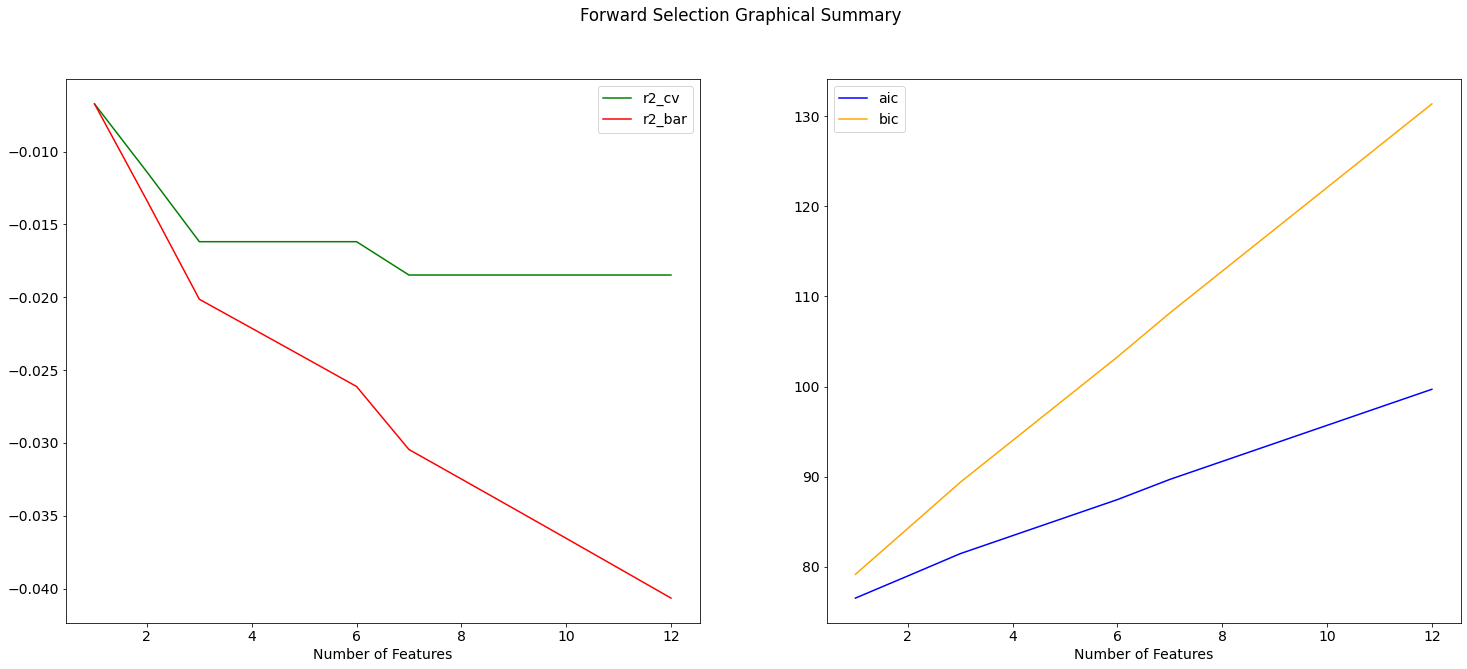

In [52]:
forwardSelection(lasso, X, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.559
Date:                Mon, 21 Feb 2022   Prob (F-statistic):              0.100
Time:                        00:03:07   Log-Likelihood:                -911.23
No. Observations:                 517   AIC:                             1848.
Df Residuals:                     504   BIC:                             1904.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1319  

/Users/sdk/Desktop/UGA_proj/DS2_P1/python/Model_Parent_2.py:286: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


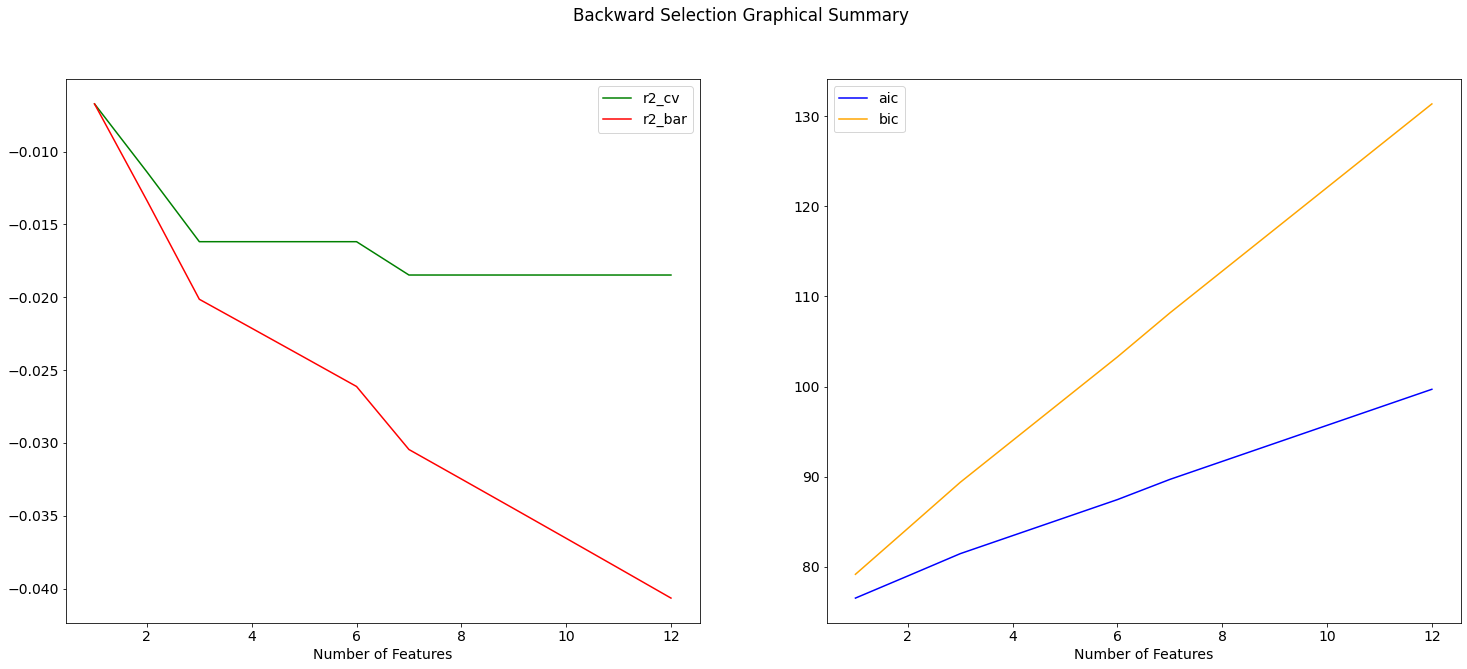

In [53]:
backwardSelection(lasso, X, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.559
Date:                Mon, 21 Feb 2022   Prob (F-statistic):              0.100
Time:                        00:03:07   Log-Likelihood:                -911.23
No. Observations:                 517   AIC:                             1848.
Df Residuals:                     504   BIC:                             1904.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1319  

/Users/sdk/Desktop/UGA_proj/DS2_P1/python/Model_Parent_2.py:406: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


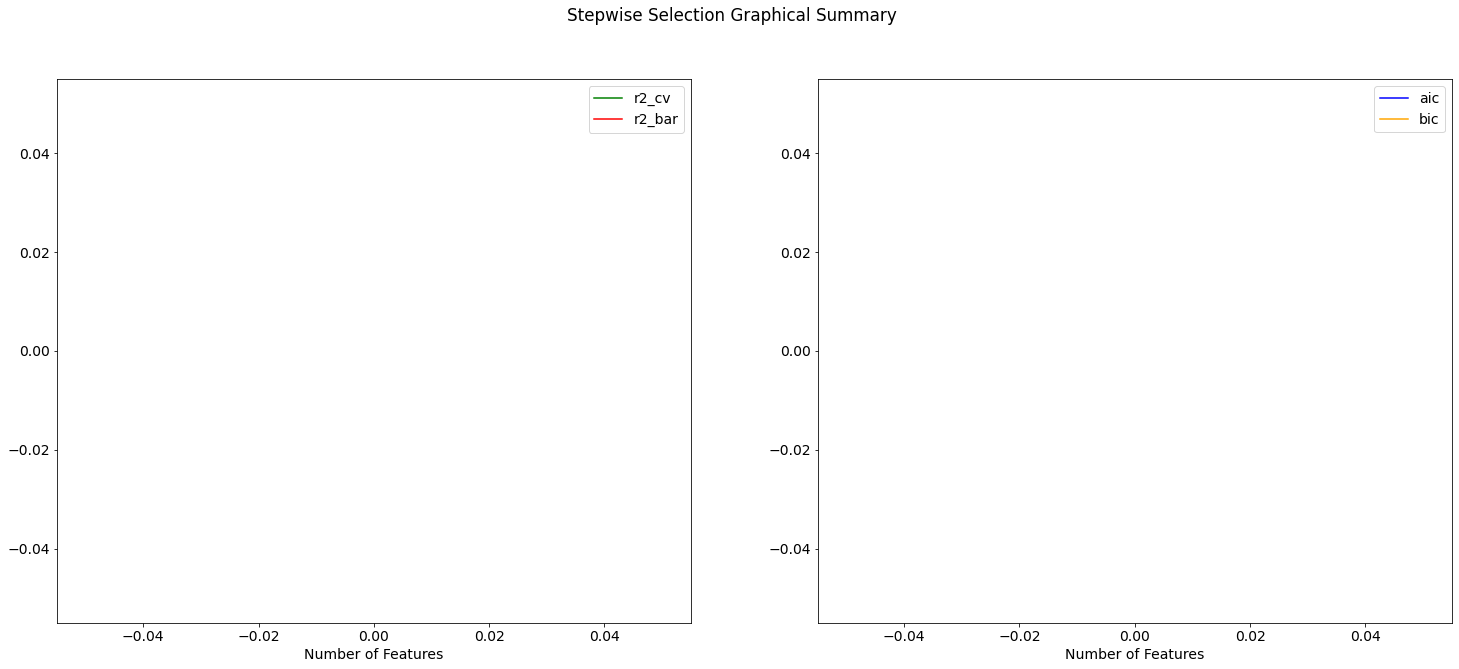

In [54]:
stepwiseSelection(lasso, X, y)

### Symbolic Regression

In [55]:
sym_reg = SymbolicRegressor()

In [56]:
forwardSelection(sym_reg, X, y)


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.559
Date:                Mon, 21 Feb 2022   Prob (F-statistic):              0.100
Time:                        00:03:08   Log-Likelihood:                -911.23
No. Observations:                 517   AIC:                             1848.
Df Residuals:                     504   BIC:                             1904.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1319   

TypeError: Expect numeric elements in y and y_pred

In [ ]:
backwardSelection(sym_reg, X, y)

In [ ]:
stepwiseSelection(sym_reg, X, y)

### Quadratic Regression

In [9]:
quad_reg = PolynomialFeatures(degree=2)
X_quad = quad_reg.fit_transform(X)
X_quad = pd.DataFrame(X_quad, columns=quad_reg.get_feature_names())
lr_q = linear_model.LinearRegression()
X_quad.apply(lambda col: col.reset_index(drop=True))
X_quad = X_quad.drop(columns = ["1"])
y_quad = y.reset_index(drop=True)
X_quad

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x8^2,x8 x9,x8 x10,x8 x11,x9^2,x9 x10,x9 x11,x10^2,x10 x11,x11^2
0,7.0,5.0,3.0,5.0,86.2,26.2,94.3,5.1,8.2,51.0,...,67.24,418.2,54.94,0.00,2601.0,341.7,0.0,44.89,0.0,0.00
1,7.0,4.0,10.0,2.0,90.6,35.4,669.1,6.7,18.0,33.0,...,324.00,594.0,16.20,0.00,1089.0,29.7,0.0,0.81,0.0,0.00
2,7.0,4.0,10.0,6.0,90.6,43.7,686.9,6.7,14.6,33.0,...,213.16,481.8,18.98,0.00,1089.0,42.9,0.0,1.69,0.0,0.00
3,8.0,6.0,3.0,5.0,91.7,33.3,77.5,9.0,8.3,97.0,...,68.89,805.1,33.20,1.66,9409.0,388.0,19.4,16.00,0.8,0.04
4,8.0,6.0,3.0,7.0,89.3,51.3,102.2,9.6,11.4,99.0,...,129.96,1128.6,20.52,0.00,9801.0,178.2,0.0,3.24,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4.0,3.0,8.0,7.0,81.6,56.7,665.6,1.9,27.8,32.0,...,772.84,889.6,75.06,0.00,1024.0,86.4,0.0,7.29,0.0,0.00
513,2.0,4.0,8.0,7.0,81.6,56.7,665.6,1.9,21.9,71.0,...,479.61,1554.9,127.02,0.00,5041.0,411.8,0.0,33.64,0.0,0.00
514,7.0,4.0,8.0,7.0,81.6,56.7,665.6,1.9,21.2,70.0,...,449.44,1484.0,142.04,0.00,4900.0,469.0,0.0,44.89,0.0,0.00
515,1.0,4.0,8.0,6.0,94.4,146.0,614.7,11.3,25.6,42.0,...,655.36,1075.2,102.40,0.00,1764.0,168.0,0.0,16.00,0.0,0.00



FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.034
Date:                Mon, 21 Feb 2022   Prob (F-statistic):              0.407
Time:                        18:11:44   Log-Likelihood:                -858.51
No. Observations:                 517   AIC:                             1889.
Df Residuals:                     431   BIC:                             2254.
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.7265   

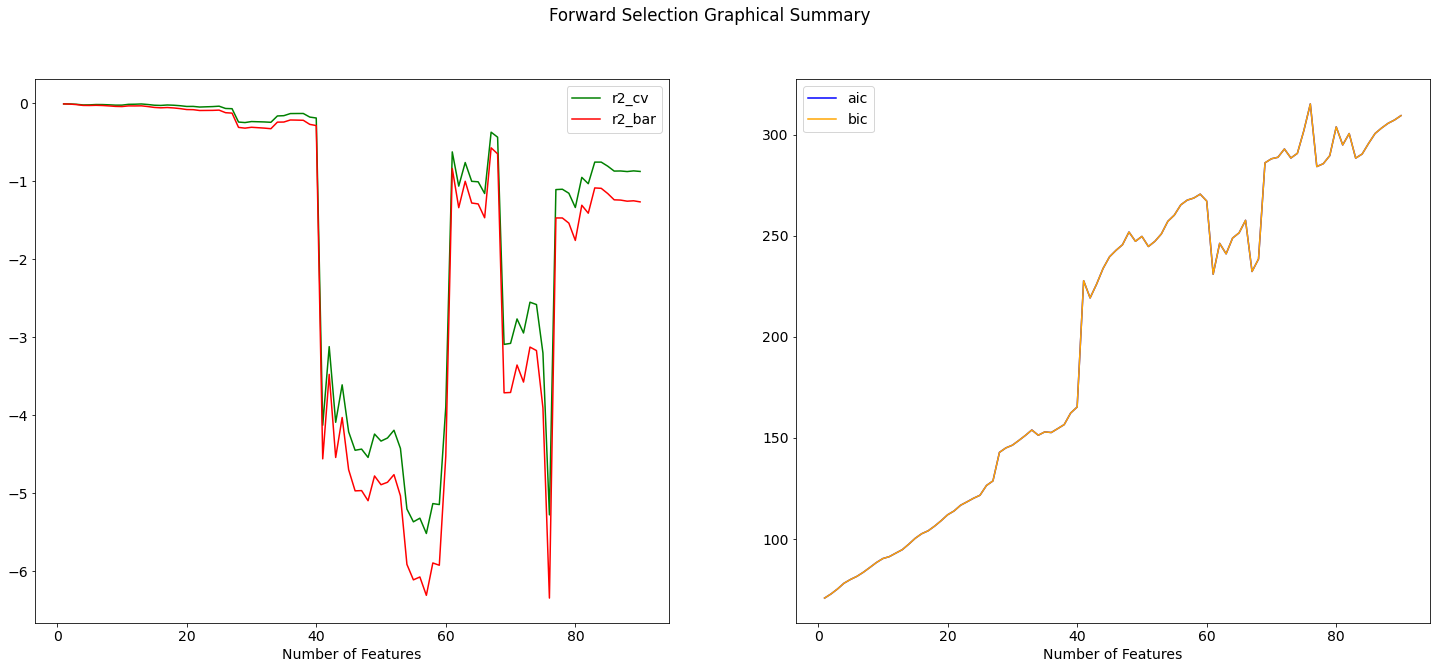

In [10]:
forwardSelection(lr_q, X_quad, y)

In [ ]:
backwardSelection(lr_q, X_quad, y)

In [ ]:
stepwiseSelection(lr_q, X_quad, y)

### Cubic Regression

In [11]:
cub_reg = PolynomialFeatures(degree=3)
X_cubic = cub_reg.fit_transform(X)
X_cubic = pd.DataFrame(X_cubic, columns=cub_reg.get_feature_names())
lr_c = linear_model.LinearRegression()
X_cubic.apply(lambda col: col.reset_index(drop=True))
X_cubic = X_cubic.drop(columns = ["1"])
y_cub = y.reset_index(drop=True)
X_cubic

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x9^3,x9^2 x10,x9^2 x11,x9 x10^2,x9 x10 x11,x9 x11^2,x10^3,x10^2 x11,x10 x11^2,x11^3
0,7.0,5.0,3.0,5.0,86.2,26.2,94.3,5.1,8.2,51.0,...,132651.0,17426.7,0.0,2289.39,0.0,0.00,300.763,0.0,0.00,0.000
1,7.0,4.0,10.0,2.0,90.6,35.4,669.1,6.7,18.0,33.0,...,35937.0,980.1,0.0,26.73,0.0,0.00,0.729,0.0,0.00,0.000
2,7.0,4.0,10.0,6.0,90.6,43.7,686.9,6.7,14.6,33.0,...,35937.0,1415.7,0.0,55.77,0.0,0.00,2.197,0.0,0.00,0.000
3,8.0,6.0,3.0,5.0,91.7,33.3,77.5,9.0,8.3,97.0,...,912673.0,37636.0,1881.8,1552.00,77.6,3.88,64.000,3.2,0.16,0.008
4,8.0,6.0,3.0,7.0,89.3,51.3,102.2,9.6,11.4,99.0,...,970299.0,17641.8,0.0,320.76,0.0,0.00,5.832,0.0,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4.0,3.0,8.0,7.0,81.6,56.7,665.6,1.9,27.8,32.0,...,32768.0,2764.8,0.0,233.28,0.0,0.00,19.683,0.0,0.00,0.000
513,2.0,4.0,8.0,7.0,81.6,56.7,665.6,1.9,21.9,71.0,...,357911.0,29237.8,0.0,2388.44,0.0,0.00,195.112,0.0,0.00,0.000
514,7.0,4.0,8.0,7.0,81.6,56.7,665.6,1.9,21.2,70.0,...,343000.0,32830.0,0.0,3142.30,0.0,0.00,300.763,0.0,0.00,0.000
515,1.0,4.0,8.0,6.0,94.4,146.0,614.7,11.3,25.6,42.0,...,74088.0,7056.0,0.0,672.00,0.0,0.00,64.000,0.0,0.00,0.000


In [12]:
forwardSelection(lr_c, X_cubic, y)


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     1.094
Date:                Mon, 21 Feb 2022   Prob (F-statistic):              0.267
Time:                        18:11:55   Log-Likelihood:                -563.33
No. Observations:                 517   AIC:                             1869.
Df Residuals:                     146   BIC:                             3445.
Df Model:                         370                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1531.2343   

In [ ]:
backwardSelection(lr_c, X_cubic, y)

In [ ]:
stepwiseSelection(lr_c, X_cubic, y)